In [2]:
import pandas as pd
import numpy as np
import scipy as sci

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.api import STLForecast

In [3]:
ur = pd.read_csv('Mass Monthly Unemployment Rate.csv')

In [4]:
print(ur.head())
print(ur.shape)

         DATE  MAURN
0  1976-01-01   11.6
1  1976-02-01   11.3
2  1976-03-01   10.9
3  1976-04-01    9.9
4  1976-05-01    9.4
(529, 2)


In [5]:
ur.dtypes

DATE      object
MAURN    float64
dtype: object

In [6]:
#reimporting csv while converting DATE to datatime object
ur = pd.read_csv('Mass Monthly Unemployment Rate.csv', parse_dates=['DATE'])
print(ur.dtypes)
print(ur.head())
print(ur.shape)

DATE     datetime64[ns]
MAURN           float64
dtype: object
        DATE  MAURN
0 1976-01-01   11.6
1 1976-02-01   11.3
2 1976-03-01   10.9
3 1976-04-01    9.9
4 1976-05-01    9.4
(529, 2)


## Checking for Stationarity

<AxesSubplot:xlabel='DATE', ylabel='MAURN'>

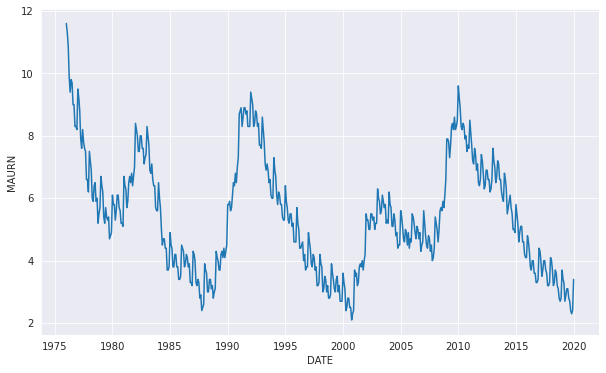

In [7]:
#plotting a simply line graph with MAURN on Y and DATE on X
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x=ur.DATE,y=ur.MAURN)

Above we can see that the mean doesn't appear to be constant and variance appears to be unbounded.  So far, the data appears to be nonstationary.  Let's look at an ACF plot to continue our investigation

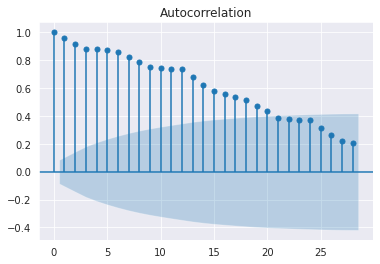

In [8]:
#Plotting ACF (AutoCorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ur.MAURN)
plt.show()

Above we can see that there is autocorrelation with lag terms up to about 30 lags out.  This is generally indicative of nonstationary data as well.  If the data was stationary we'd expect a sharp drop in autocorrelation after the first lag term or so.  

Let's now use a hypothesis test to determine stationarity

In [9]:
#Using the Augmented Dickey Fuller test (ADF)
'''
The null hypothesis of the Augmented Dickey-Fuller is that there 
is a unit root, with the alternative that there is no unit root. 
If the pvalue is above a critical size, then we cannot reject that 
there is a unit root. A unit root is a trend in time series of
systematic unpredictability
'''
from statsmodels.tsa.stattools import adfuller
def adfReadout(data):
    results = adfuller(data)
    print('ADF Statistic: {:.3f}'.format(results[0]))
    print('p-value: {:.3f}'.format(results[1]))
    print('Critical Values:')
    for key, value in results[4].items():
        print('\t{}:{:.3f}'.format(key,value))
    if results[1] < 0.05:
        print('\np-value indicates stationarity')
    else:
         print('\np-value indicates non-stationarity')

adfReadout(ur.MAURN)

ADF Statistic: -2.688
p-value: 0.076
Critical Values:
	1%:-3.443
	5%:-2.867
	10%:-2.570

p-value indicates non-stationarity


It appears that we do not have enough evidence to reject the null hypothesis so we conclude there is evidence of a unit root and therefore evidence of the data being nonstationary.  More info on ADF can be found here:
https://machinelearningmastery.com/time-series-data-stationary-python/

## Fitting models

R has a package to automatically optimize parameters for Autoregressive, Moving Average, ARMA, and ARIMA models.

A similar package was recently deployed for python called pmdarima
https://github.com/alkaline-ml/pmdarima/blob/master/examples/quick_start_example.ipynb

More information about tuning these ARIMA family models can be found here:
https://stackoverflow.com/questions/22770352/auto-arima-equivalent-for-python

In [10]:
#check if python's pmdarima package is installed, it should come with Anaconda (use pip install if not)
import pmdarima as pm

In [11]:
#using stepwise fit
stepwise_fit = pm.auto_arima(ur.MAURN)
stepwise_fit.summary()

/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  529
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -178.531
Date:                Fri, 06 Nov 2020   AIC                            373.063
Time:                        01:26:08   BIC                            407.216
Sample:                             0   HQIC                           386.433
                                - 529                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0090      0.015     -0.594      0.553      -0.039       0.021
ar.L1          0.9184      0.059     15.443      0.000       0.802       1.035
ar.L2         -0.5463      0.088     -6.196      0.000      -0.719      -0.374
ar.L3         -0.4149      0.087     -4.789      0.000      -0.585      -0.245
ar.L4          0.3409      0.055      6.165      0.000       0.233       0.449
ma.L1         -1.2184      0.019    -63.688      0.000      -1.256      -1.181
ma.L2          0.9456      0.019     48.703      0.000       0.908       0.984
sigma2         0.1131      0.007     15.627      0.000       0.099       0.127
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                88.68
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.90
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
#using random fit
random_fit = pm.auto_arima(ur.MAURN, stepwise=False, random=True)
random_fit.summary()

/home/jordan/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maxi

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  529
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -251.545
Date:                Fri, 06 Nov 2020   AIC                            517.091
Time:                        01:26:11   BIC                            546.974
Sample:                             0   HQIC                           528.790
                                - 529                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0018      0.003     -0.616      0.538      -0.008       0.004
ar.L1          0.8218      0.078     10.567      0.000       0.669       0.974
ar.L2         -0.0045      0.083     -0.054      0.957      -0.167       0.158
ar.L3         -0.3990      0.075     -5.302      0.000      -0.547      -0.252
ar.L4          0.4905      0.053      9.296      0.000       0.387       0.594
ma.L1         -0.8723      0.059    -14.680      0.000      -0.989      -0.756
sigma2         0.1516      0.010     15.114      0.000       0.132       0.171
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                84.85
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Evaluated Model fit via residuals
#grabbing fit residuals
residuals = stepwise_fit.resid()

In [14]:
#plotting partial autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

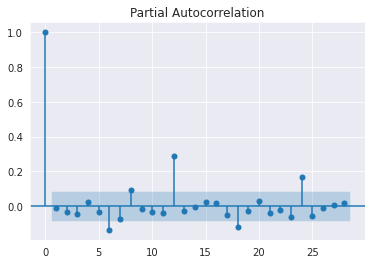

In [15]:
pm.utils.plot_pacf(residuals, alpha=0.05)

In [16]:
#evaluating fit via Ljung Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags =1, return_df=True)

,lb_stat,lb_pvalue
1,0.063878,0.800468


As per our Ljung Box test readout we can retain the null, indicating that we have white noise residuals/our fit is behaving correctly

## Forecasting

In [17]:
forecasts = stepwise_fit.predict(n_periods=24)
forecasts.shape[0]

24

In [18]:
#plotting with bokeh
from bokeh.plotting import figure, show, output_notebook

In [19]:
#initializing bokeh plotting functionality
output_notebook()
def plot_arima(truth, forecasts, title ='ARIMA', xaxis_label="Time",
              yaxis_label='Value', c1='#0000FF', c2='#008000',
              forecast_start=None, **kwargs):
    #make truth and forecsts into pandas Series dtype
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    #formatting so Truth always plots the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    #if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth+n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    #set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    #add the lines
    p.line(truth.index, truth.values, color=c1, legend_label='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend_label = 'Forecasted')
    
    return p

Loading BokehJS ...

In [20]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([-0.0128635 , 11.58713648, 11.28990959, 10.91195348, 10.10075336,
        9.74396992, 10.1913311 ,  9.80344931,  8.61428003,  8.51077867])

In [21]:
ur.MAURN.values

array([11.6, 11.3, 10.9,  9.9,  9.4,  9.8,  9.7,  9. ,  9. ,  8.3,  8.3,
        8.2,  9.5,  9.2,  8.8,  7.9,  7.6,  8.2,  7.8,  7.6,  7.5,  6.6,
        6.6,  6.2,  7.5,  7.2,  6.9,  6. ,  5.9,  6.4,  6.5,  5.9,  6. ,
        5.2,  5.5,  5.7,  6.7,  6.4,  6.2,  5.4,  5.2,  5.7,  5.4,  5.3,
        5.4,  4.7,  4.8,  4.9,  6.1,  5.8,  5.8,  5.3,  5.6,  6.1,  6.1,
        5.7,  5.6,  5.2,  5.2,  5.1,  6.7,  6.4,  6.3,  5.7,  5.9,  6.5,
        6.7,  6.5,  6.8,  6.4,  6.7,  7. ,  8.4,  8.2,  8. ,  7.5,  7.5,
        8. ,  8. ,  7.6,  7.6,  7.1,  7.3,  7.4,  8.3,  8. ,  7.7,  6.9,
        6.8,  7.1,  6.6,  6.4,  6.4,  5.7,  5.6,  5.6,  6.5,  6. ,  5.7,
        5. ,  4.5,  4.7,  4.7,  4.4,  4.4,  3.7,  3.7,  3.8,  4.9,  4.5,
        4.4,  3.8,  3.8,  4.2,  4.2,  3.8,  3.8,  3.4,  3.4,  3.5,  4.5,
        4.4,  4.3,  3.8,  3.9,  4.2,  4.1,  3.8,  3.9,  3.3,  3.3,  3.2,
        4.3,  4.2,  4. ,  3.3,  3.2,  3.4,  3.3,  2.8,  2.9,  2.4,  2.5,
        2.6,  3.9,  3.7,  3.6,  3. ,  3. ,  3.4,  3

In [22]:
#evaluating model fit
show(plot_arima(ur.MAURN.values, in_sample_preds,
               title='Original Series & in-Sample Predictions',
                c2='#FF0000',forecast_start=0))

In [23]:
#forecasting on predicted values
show(plot_arima(ur.MAURN.values, forecasts))

#### In order to take advantage of some out of the box visualization functionality of statsmodels, lets use the tuned paramters from the pmdarima package and plug them in vanilla arima from statsmodels

In [24]:
import statsmodels.api as sm

In [25]:
#let's reset the data with dates as the index
ur = ur.set_index('DATE')
ur.head()

,MAURN
DATE,
1976-01-01,11.6
1976-02-01,11.3
1976-03-01,10.9
1976-04-01,9.9
1976-05-01,9.4


In [26]:
ur.columns

Index(['MAURN'], dtype='object')

In [27]:
#our pmd model ended up finding SARIMAX(4, 1, 2) to be optimal
mod = sm.tsa.statespace.SARIMAX(ur, order=(4,1,2))
results = mod.fit()
results.summary()

/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/jordan/anaconda3/lib/python3.8/site

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  MAURN   No. Observations:                  529
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -176.307
Date:                Fri, 06 Nov 2020   AIC                            366.614
Time:                        01:26:13   BIC                            396.497
Sample:                    01-01-1976   HQIC                           378.313
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.055     17.297      0.000       0.841       1.055
ar.L2         -0.5618      0.085     -6.592      0.000      -0.729      -0.395
ar.L3         -0.3929      0.083     -4.707      0.000      -0.557      -0.229
ar.L4          0.3437      0.053      6.519      0.000       0.240       0.447
ma.L1         -1.2591      0.010   -120.257      0.000      -1.280      -1.239
ma.L2          0.9811      0.012     84.206      0.000       0.958       1.004
sigma2         0.1129      0.007     17.012      0.000       0.100       0.126
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                84.15
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.90
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The results match out previous model and have the same 4 y-lag, 2 error lag structure

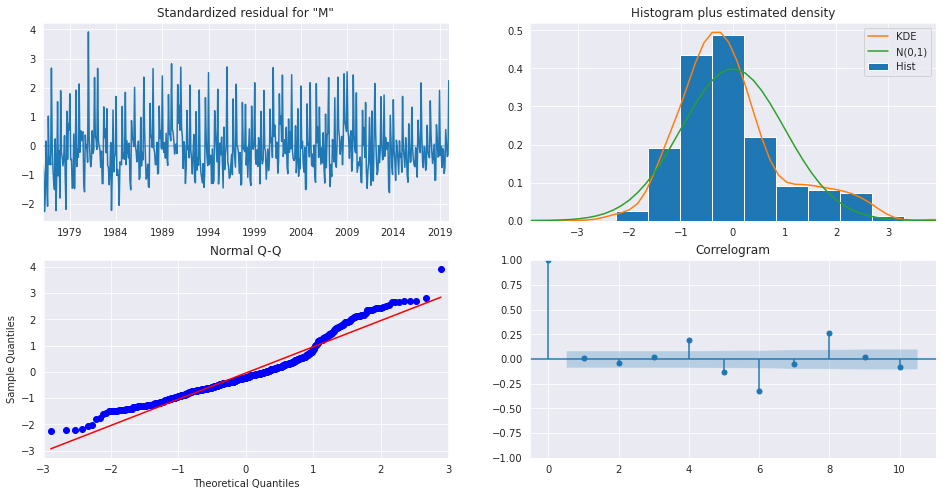

In [28]:
#let's run some diagnostic plots
results.plot_diagnostics(figsize=(16,8))
plt.show()

our residuals are not perfectly normally distributed but they are pretty close.  We can continue forward

In [29]:
#let's figure out what the last date is to set our visual valiation
ur.iloc[-1:,]

,MAURN
DATE,
2020-01-01,3.4


In [30]:
ur.tail(5)

,MAURN
DATE,
2019-09-01,2.7
2019-10-01,2.4
2019-11-01,2.3
2019-12-01,2.4
2020-01-01,3.4


<AxesSubplot:xlabel='DATE'>

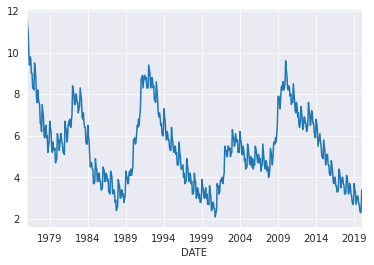

In [31]:
ur.MAURN.plot()

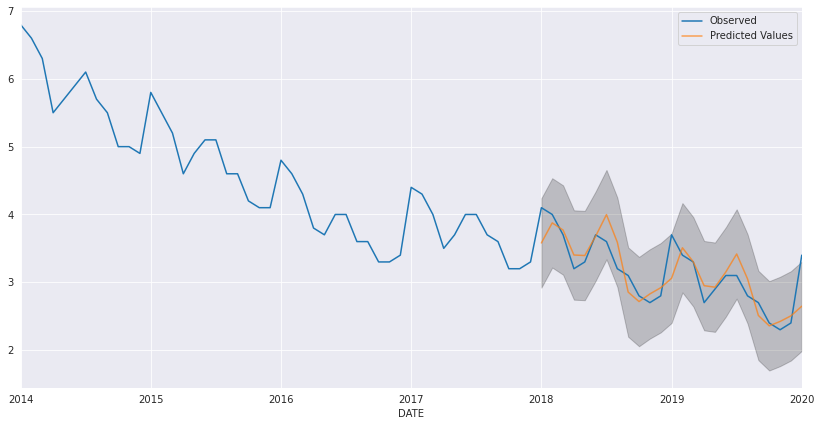

In [32]:
#validating our model visually against true values
#for ease of visual let's look at 2014 onward for true values and 
#2018 for predicted

#getting predictions
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'))
#getting confidence intervals with a defaul of alpha = 0.05 which is 
#95%
pred_ci = pred.conf_int()

#plotting observed
ax = ur.MAURN['2014':].plot(label='Observed')
#plotting predictions
pred.predicted_mean.plot(ax=ax, label='Predicted Values', alpha=0.7,
                        figsize=(14,7))
#plotting confidence intervals
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k',alpha=0.2)

plt.legend()
plt.show()

The predicted values are lining up with the true value reasonably well, caputuring a downward trend with seasonality relatively well

Let's take a look at some metrics, namely the mean squared error and the root mean squared error

In [33]:
y_forecasted = pred.predicted_mean
y_truth = ur.MAURN['2018-01-01':]

mse = ((y_forecasted-y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.08


In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.29


The Root Mean Squared error tells us that the model was able to forecast the monthly unemployment rate within 0.29 points of the real rate.  That's pretty good.  NOTE: we didn't run a train-test split so we should expect it to be pretty good, in the real world we'd format our model that way for higher confidence in our model but the purpose of the exercise is simply to work through Time Series package functionality and practice visualizing the data

### Predictions using our ARIMA model

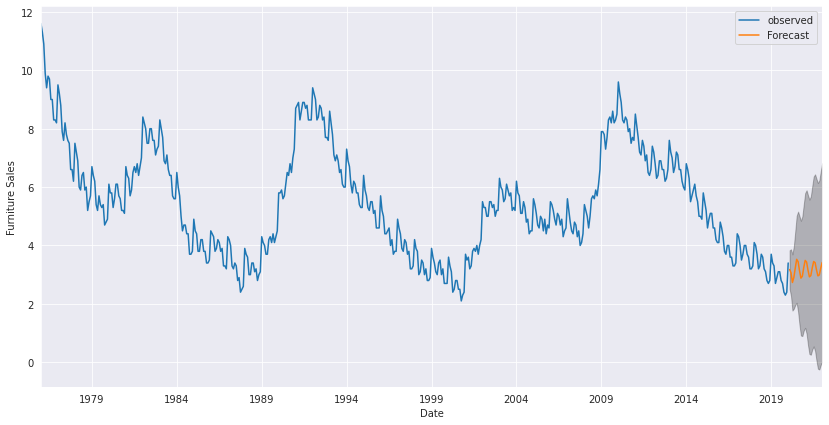

In [35]:
#predicting 2 years out
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = ur.MAURN.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

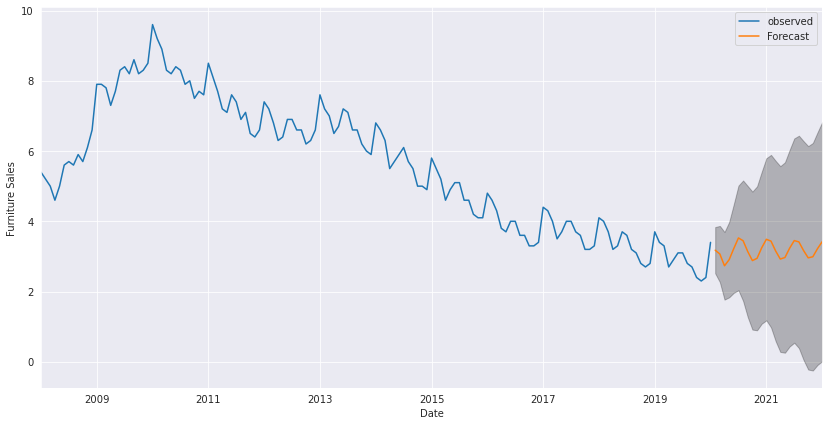

In [36]:
#zooming in on two years from 2008 forward
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = ur.MAURN['2008':].plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

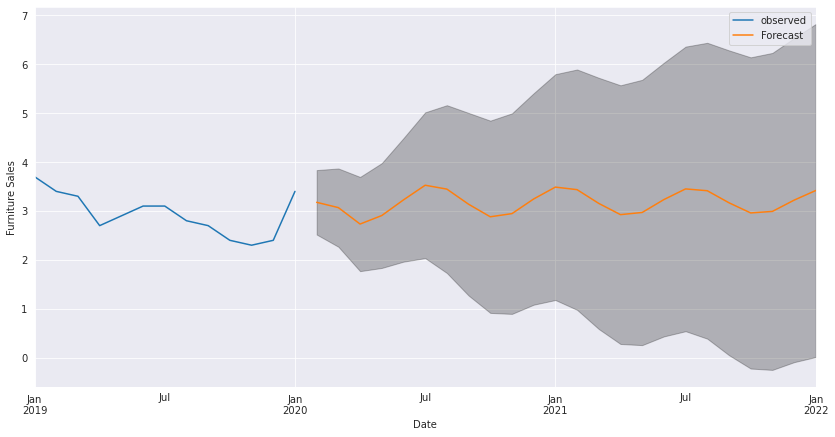

In [37]:
#zooming in from 2019 forward
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = ur.MAURN['2019':].plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

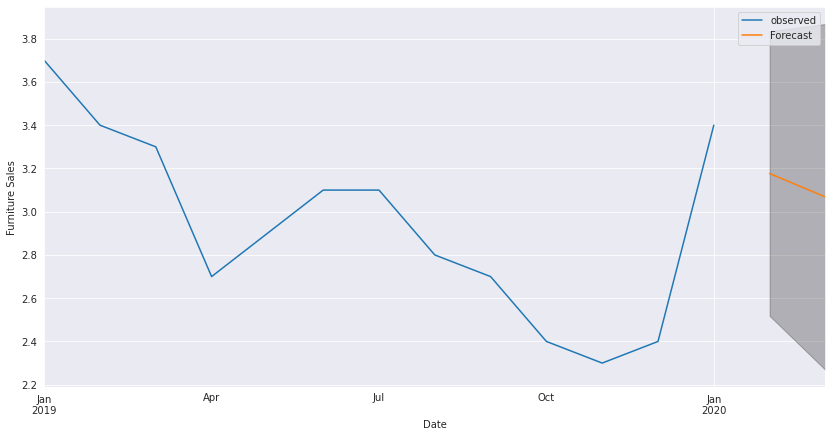

In [38]:
#zooming in from 2019 forward
pred_uc = results.get_forecast(steps =2)
pred_ci = pred_uc.conf_int()

ax = ur.MAURN['2019':].plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k', alpha=0.25)

#cosmetics
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

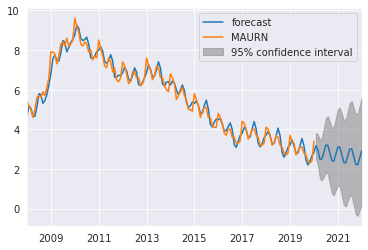

In [39]:
#trying a simple ARIMA model
timeseries=ur['MAURN']
timeseries.head()
model = sm.tsa.ARIMA(timeseries, order=(4,1,2))
resultsARIMA = model.fit()
x=resultsARIMA.plot_predict('2008','2022')

In [40]:
resultsARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.MAURN   No. Observations:                  528
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -169.969
Method:                       css-mle   S.D. of innovations              0.331
Date:                Fri, 06 Nov 2020   AIC                            355.937
Time:                        01:26:18   BIC                            390.090
Sample:                    02-01-1976   HQIC                           369.308
                         - 01-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0157      0.012     -1.282      0.200      -0.040       0.008
ar.L1.D.MAURN     0.7223      0.045     16.231      0.000       0.635       0.810
ar.L2.D.MAURN    -0.5669      0.050    -11.332      0.000      -0.665      -0.469
ar.L3.D.MAURN    -0.4319      0.050     -8.638      0.000      -0.530      -0.334
ar.L4.D.MAURN     0.1552      0.045      3.433      0.001       0.067       0.244
ma.L1.D.MAURN    -1.0408      0.010   -109.115      0.000      -1.060      -1.022
ma.L2.D.MAURN     0.9940      0.015     66.124      0.000       0.965       1.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5001           -0.8665j            1.0005           -0.1667
AR.2            0.5001           +0.8665j            1.0005            0.1667
AR.3           -1.7979           -0.0000j            1.7979           -0.5000
AR.4            3.5811           -0.0000j            3.5811           -0.0000
MA.1            0.5236           -0.8555j            1.0030           -0.1626
MA.2            0.5236           +0.8555j            1.0030            0.1626
-----------------------------------------------------------------------------
"""

## Fitting Seasonal Trend Loess (STL) Decomposition model

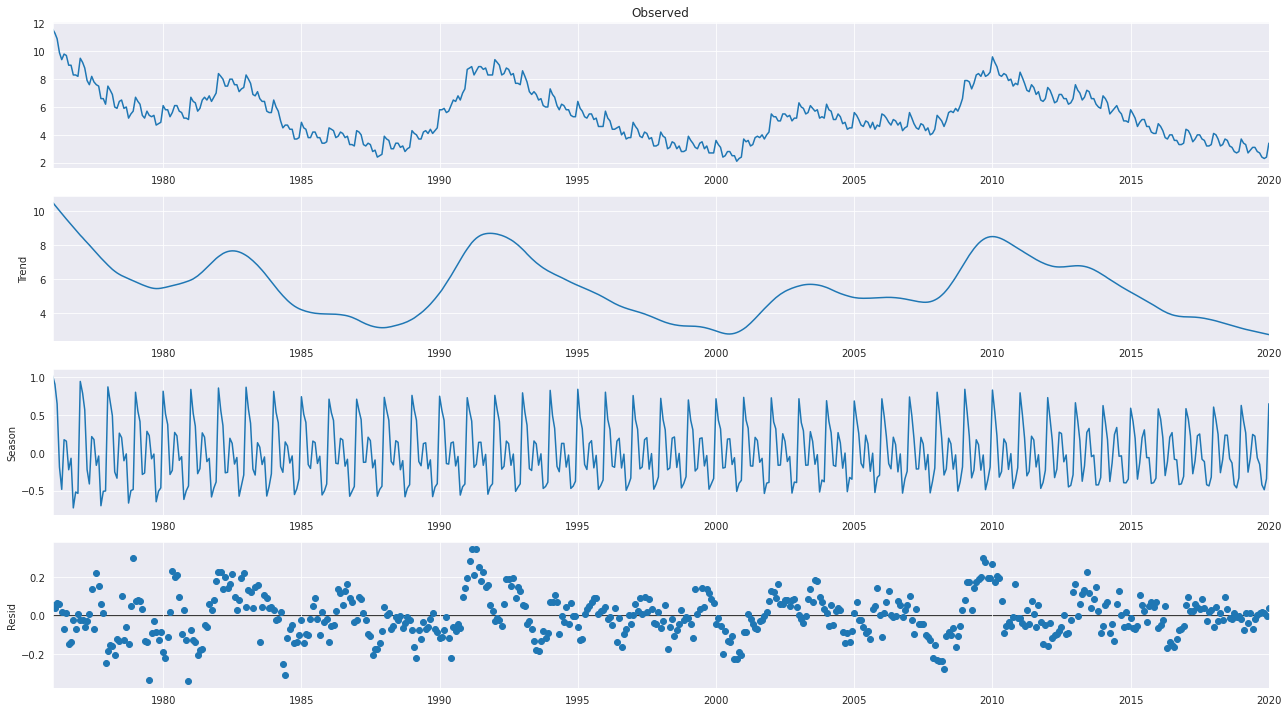

In [41]:
from statsmodels.tsa.seasonal import STL
res = STL(ur).fit()

from pylab import rcParams
rcParams['figure.figsize'] =18,10
fig = res.plot()
plt.show()

<AxesSubplot:xlabel='DATE'>

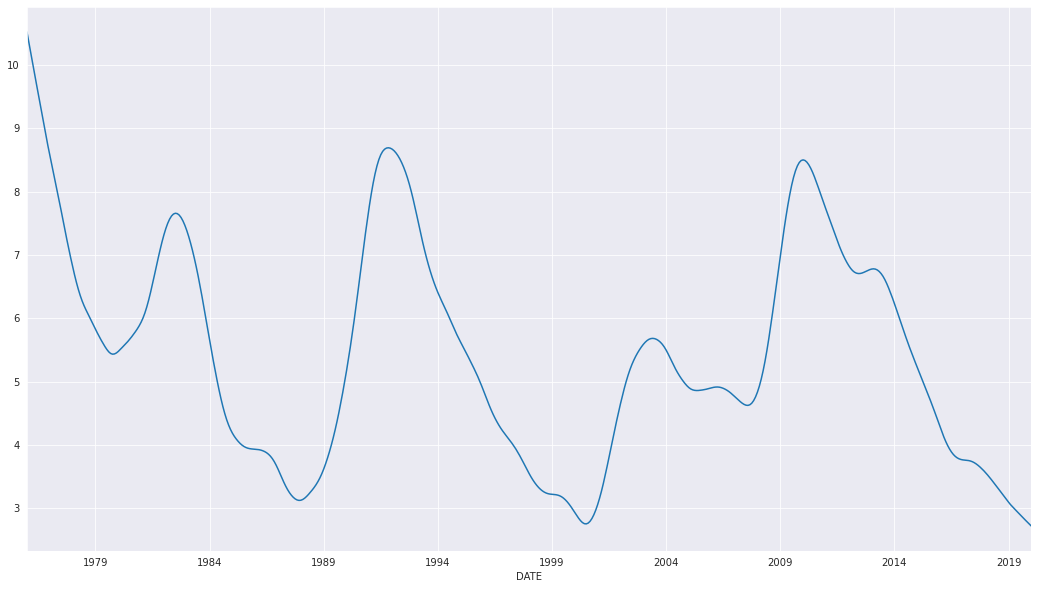

In [42]:
res.trend.plot()

/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


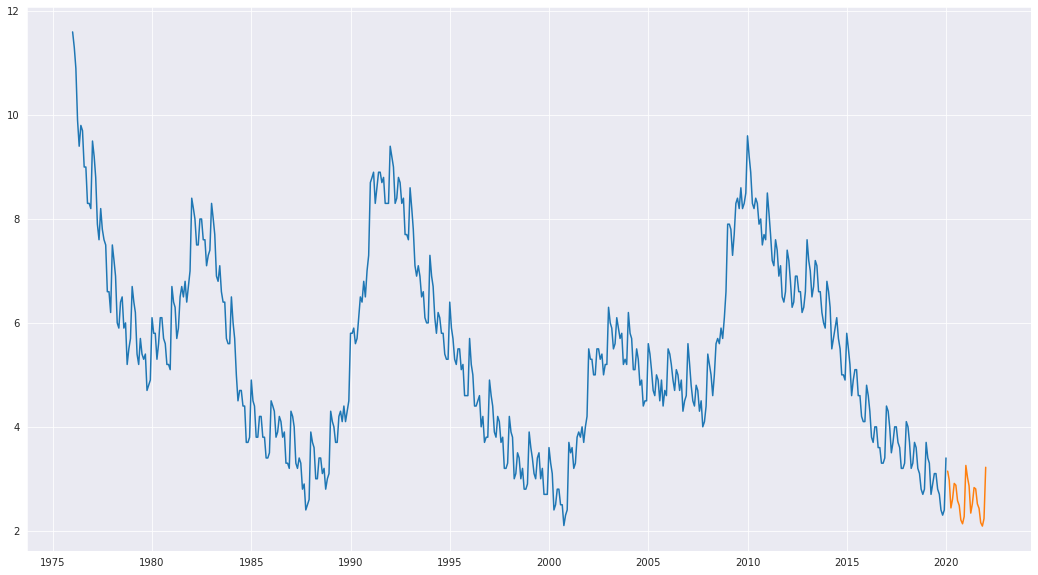

In [45]:
#forcasting
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
stlf = STLForecast(ur,ARIMA,model_kwargs={'order':(4,1,2)})
res = stlf.fit()
forecasts =res.forecast(24)
plt.plot(ur)
plt.plot(forecasts)
plt.show()

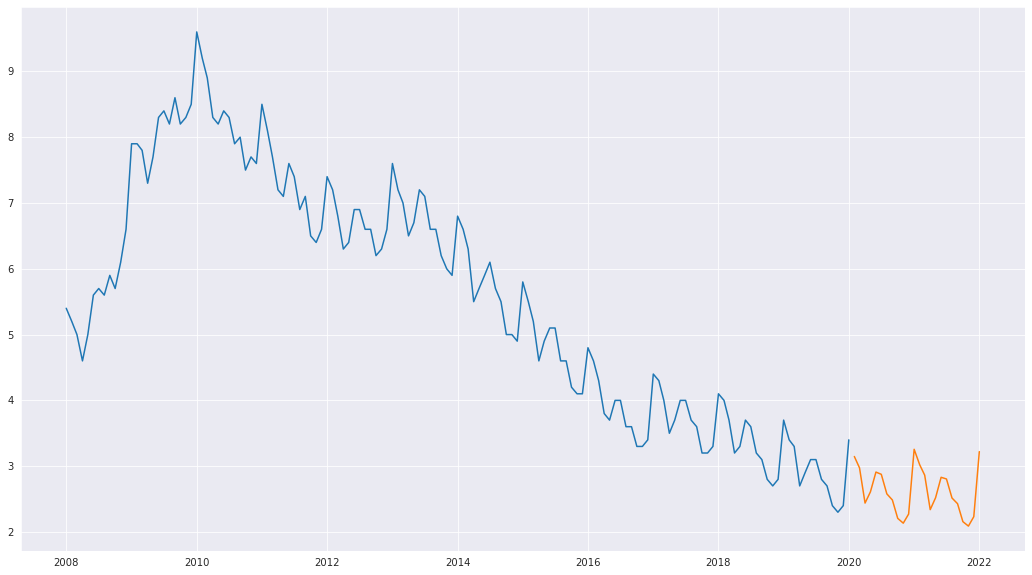

In [49]:
plt.plot(ur['2008':])
plt.plot(forecasts)
plt.show()